In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from geopy.distance import great_circle
from storage import Storage

db = Storage()
db.db = '../network_data/grid.db'


node_df = db.export_table('nodes_loc')
edge_df = db.export_table('edges')

In [98]:
node_df.head()

,Name,Facility Code,TFO,Planning Area,Bus Number,Voltage (kV),Capability (MW),node_id,Substation,Shape,Latitude (generated),Longitude (generated)
0,Al Rothbauer,321S,AltaLink,04-Medicine Hat,976,138,220,0,321S,Point,50.062035,-110.721055
1,Amoco Empress,163S,AltaLink,48-Empress,262,240,160,1,163S,Point,50.678140,-110.026638
2,Amoco Empress,163S,AltaLink,48-Empress,267,138,125,2,163S,Point,50.678140,-110.026638
3,Anderson,801S,ATCO,43-Sheerness,1484,240,1006,3,801S,Point,51.429079,-111.799296
4,Anderson,801S,ATCO,43-Sheerness,1485,144,85,4,801S,Point,51.429079,-111.799296


In [99]:
edge_df.head()

,Line Name,Voltage (kV),Substation Name,Facility Code,Planning Area,TFO,Capability (MW),edge_id
0,1002L,240,Amoco Empress,163S,48-Empress,AltaLink,158,0
1,1002L,240,Jenner,275S,48-Empress,AltaLink,265,1
2,1005AL,240,Little Bow,991S,49-Stavely,AltaLink,84,2
3,1005L,240,Picture Butte,120S,54-Lethbridge,AltaLink,311,3
4,1005L,240,Milo,356S,47-Brooks,AltaLink,117,4


In [100]:
node_data, edge_data = node_df.to_dict('records'), edge_df.to_dict('records')

In [101]:
#Paul added the nodes and edges and attributes - work for real network 
#Rafi worked on disconnected nodes issue (that was causing major problems in the real network) in this section as well

import math

G = nx.Graph()

for location in node_data:         # loops through node-and adds node and attributes to the 
    G.add_node(
        location['Facility Code'], 
        name=location['Name'],
        node_id=location['node_id'],
        tfo=location['TFO'],
        planning_area=location['Planning Area'],
        bus_number=location['Bus Number'],
        voltage_kv=location['Voltage (kV)'],
        capability_mw=location['Capability (MW)'],
        substation=location['Substation'],
        pos=(location['Latitude (generated)'], location['Longitude (generated)'])
    )
    
# Preprocess edge data to create source-target pairs
edge_pairs = edge_df.groupby('Line Name').apply(lambda df: df.iloc[0]['Facility Code'] if len(df) == 1 else list(df['Facility Code']))
edges_to_add = [(pair[0], pair[1], {'edge_id': idx}) for idx, pair in enumerate(edge_pairs) if isinstance(pair, list) and pair[0] is not None and pair[1] is not None]


def check_node(code):
    found = False  # Flag to indicate if the specific facility code is found
    # Iterate over all nodes and their attributes
    for node in G.nodes():
        # Check if this node's facility_code matches the specific facility code
        if node == code:
            found = True
            print('found ', code)
            return found
    if not found:
        print('did not find  ', code)
        return found


for source, target, edge_attr in edges_to_add:
    # Check if both source and target nodes exist in the graph
    if check_node(source) and check_node(target):
        print('adding edge', source, target)
        G.add_edge(source, target, **edge_attr)
    else:
        print(f"Skipping edge from {source} to {target} as one of the nodes is missing.")
        
#This is Rafi's work where he did some cleaning up to add edges between nodes (accurately based on acrgis map site) because there were disconnected nodes in the network - problem mentioned in the final report) 
G.add_edge("379S","415S")
G.add_edge("773S","775S")
G.add_edge("773S","771S")
G.add_edge("771S","892S")
G.add_edge("771S","774S")
G.add_edge("267S","899S")
G.add_edge("267S","221S")
G.add_edge("267S","880S")
G.add_edge("880S","716S")
G.add_edge("428S","151S")
G.add_edge("428S","179S")
G.add_edge("447S","158S")
G.add_edge("447S","324S")
G.add_edge("257S","158S")
G.add_edge("257S","158S")
G.add_edge("435S","324S")
G.add_edge("435S","504S")
G.add_edge("981S","804S")
G.add_edge("981S","803S")
G.add_edge("873S","769S")
G.add_edge("873S","765S")
G.add_edge("873S","769S")
G.add_edge("873S","756S")
G.add_edge("765S","843S")
G.add_edge("765S","757S")
G.add_edge("765S","843S")
G.add_edge("765S","764S")
G.add_edge("764S","757S")
G.add_edge("764S","757S")
G.add_edge("764S","223S")
G.add_edge("764S","137S")
G.add_edge("819S","777S")
G.add_edge("956S","777S")
G.add_edge("956S","709S")
G.add_edge("363S","959S")
G.add_edge("363S","932S")
G.add_edge("772S","776S")
G.add_edge("772S","2037S")
G.add_edge("772S","767S")
G.add_edge("914S","893S")
G.add_edge("914S","767S")
G.add_edge("893S","893S")
G.add_edge("914S","164S")
G.add_edge("893S","164S")
G.add_edge("914S","163S")
G.add_edge("893S","163S")
G.add_edge("114S","948S")
G.add_edge("114S","770S")
G.add_edge("759S","615S")
G.add_edge("759S","775S")
G.add_edge("759S","615S")
G.add_edge("1019S","649S")
G.add_edge("1019S","649S")
G.add_edge("1019S","1024S")
G.add_edge("1019S","251S")
G.add_edge("719S","523S")
G.add_edge("719S","368S")
G.add_edge("139S","83S")
G.add_edge("139S","254S")
G.add_edge("254S","315S")
G.add_edge("67S","315S")
G.add_edge("370S","315S")
G.add_edge("512S","392S")
G.add_edge("512S","65S")
G.add_edge("604S","928S")
G.add_edge("604S","15S")
G.add_edge("492S","15S")
G.add_edge("492S","370S")
G.add_edge("385S","229S")
G.add_edge("385S","225S")
G.add_edge("225S","226S")
G.add_edge("313S","225S")
G.add_edge("313S","67S")
G.add_edge("313S","67S")
G.add_edge("708S","710S")
G.add_edge("708S","709S")

G.add_edge("322S","103S")
G.add_edge("205S","103S")
G.add_edge("205S","312S")
G.add_edge("528S","240S")
G.add_edge("528S","138S")
G.add_edge("528S","418S")
G.add_edge("528S","15S")
G.add_edge("528S","674S")
G.add_edge("383S","103S")
G.add_edge("383S","59S")
G.add_edge("383S","415S")
G.add_edge("134S","336S")
G.add_edge("134S","135S")
G.add_edge("662S","562S")
G.add_edge("662S","649S")

G.add_edge("594S","296S")
G.add_edge("594S","656S")
G.add_edge("594S","377S")
G.add_edge("594S","329S")
G.add_edge("594S","213S")
G.add_edge("918S","710S")
G.add_edge("918S","710S")
#G.add_edge("918S","528S")
G.add_edge("918S","252S")
G.add_edge("918S","757S")
G.add_edge("757S","252S")
G.add_edge("526S","252S")
G.add_edge("526S","757S")
G.add_edge("296S","656S")
G.add_edge("656S","377S")
G.add_edge("656S","329S")
G.add_edge("656S","213S")
#G.add_edge("656S","121S")
G.add_edge("227S","121S")
G.add_edge("1045S","972S")
G.add_edge("1045S","801S")
G.add_edge("572S","963S")
G.add_edge("572S","802S")
G.add_edge("329S","213S")
G.add_edge("991S","356S")
G.add_edge("991S","554S")
G.add_edge("142S","678S")
G.add_edge("142S","65S")
G.add_edge("142S","237S")
G.add_edge("112S","103S")
G.add_edge("112S","806S")
G.add_edge("112S","312S")
G.add_edge("112S","354S")



G.remove_edges_from([(u, v) for u, v in G.edges() if u == v])       #removing any self-loops


found  163S
found  275S
adding edge 163S 275S
found  120S
found  356S
adding edge 120S 356S
found  498S
found  895S
adding edge 498S 895S
found  163S
found  562S
adding edge 163S 562S
found  244S
found  324S
adding edge 244S 324S
found  2075S
found  244S
adding edge 2075S 244S
found  356S
found  554S
adding edge 356S 554S
found  138S
found  237S
adding edge 138S 237S
found  138S
found  237S
adding edge 138S 237S
found  370S
found  554S
adding edge 370S 554S
found  485S
found  554S
adding edge 485S 554S
found  574S
found  650S
adding edge 574S 650S
found  138S
found  59S
adding edge 138S 59S
found  138S
found  59S
adding edge 138S 59S
found  28S
found  324S
adding edge 28S 324S
found  28S
found  324S
adding edge 28S 324S
found  132S
found  324S
adding edge 132S 324S
found  205S
found  312S
adding edge 205S 312S
found  103S
found  205S
adding edge 103S 205S
found  132S
found  28S
adding edge 132S 28S
found  2075S
found  324S
adding edge 2075S 324S
found  2075S
found  324S
adding edge 207

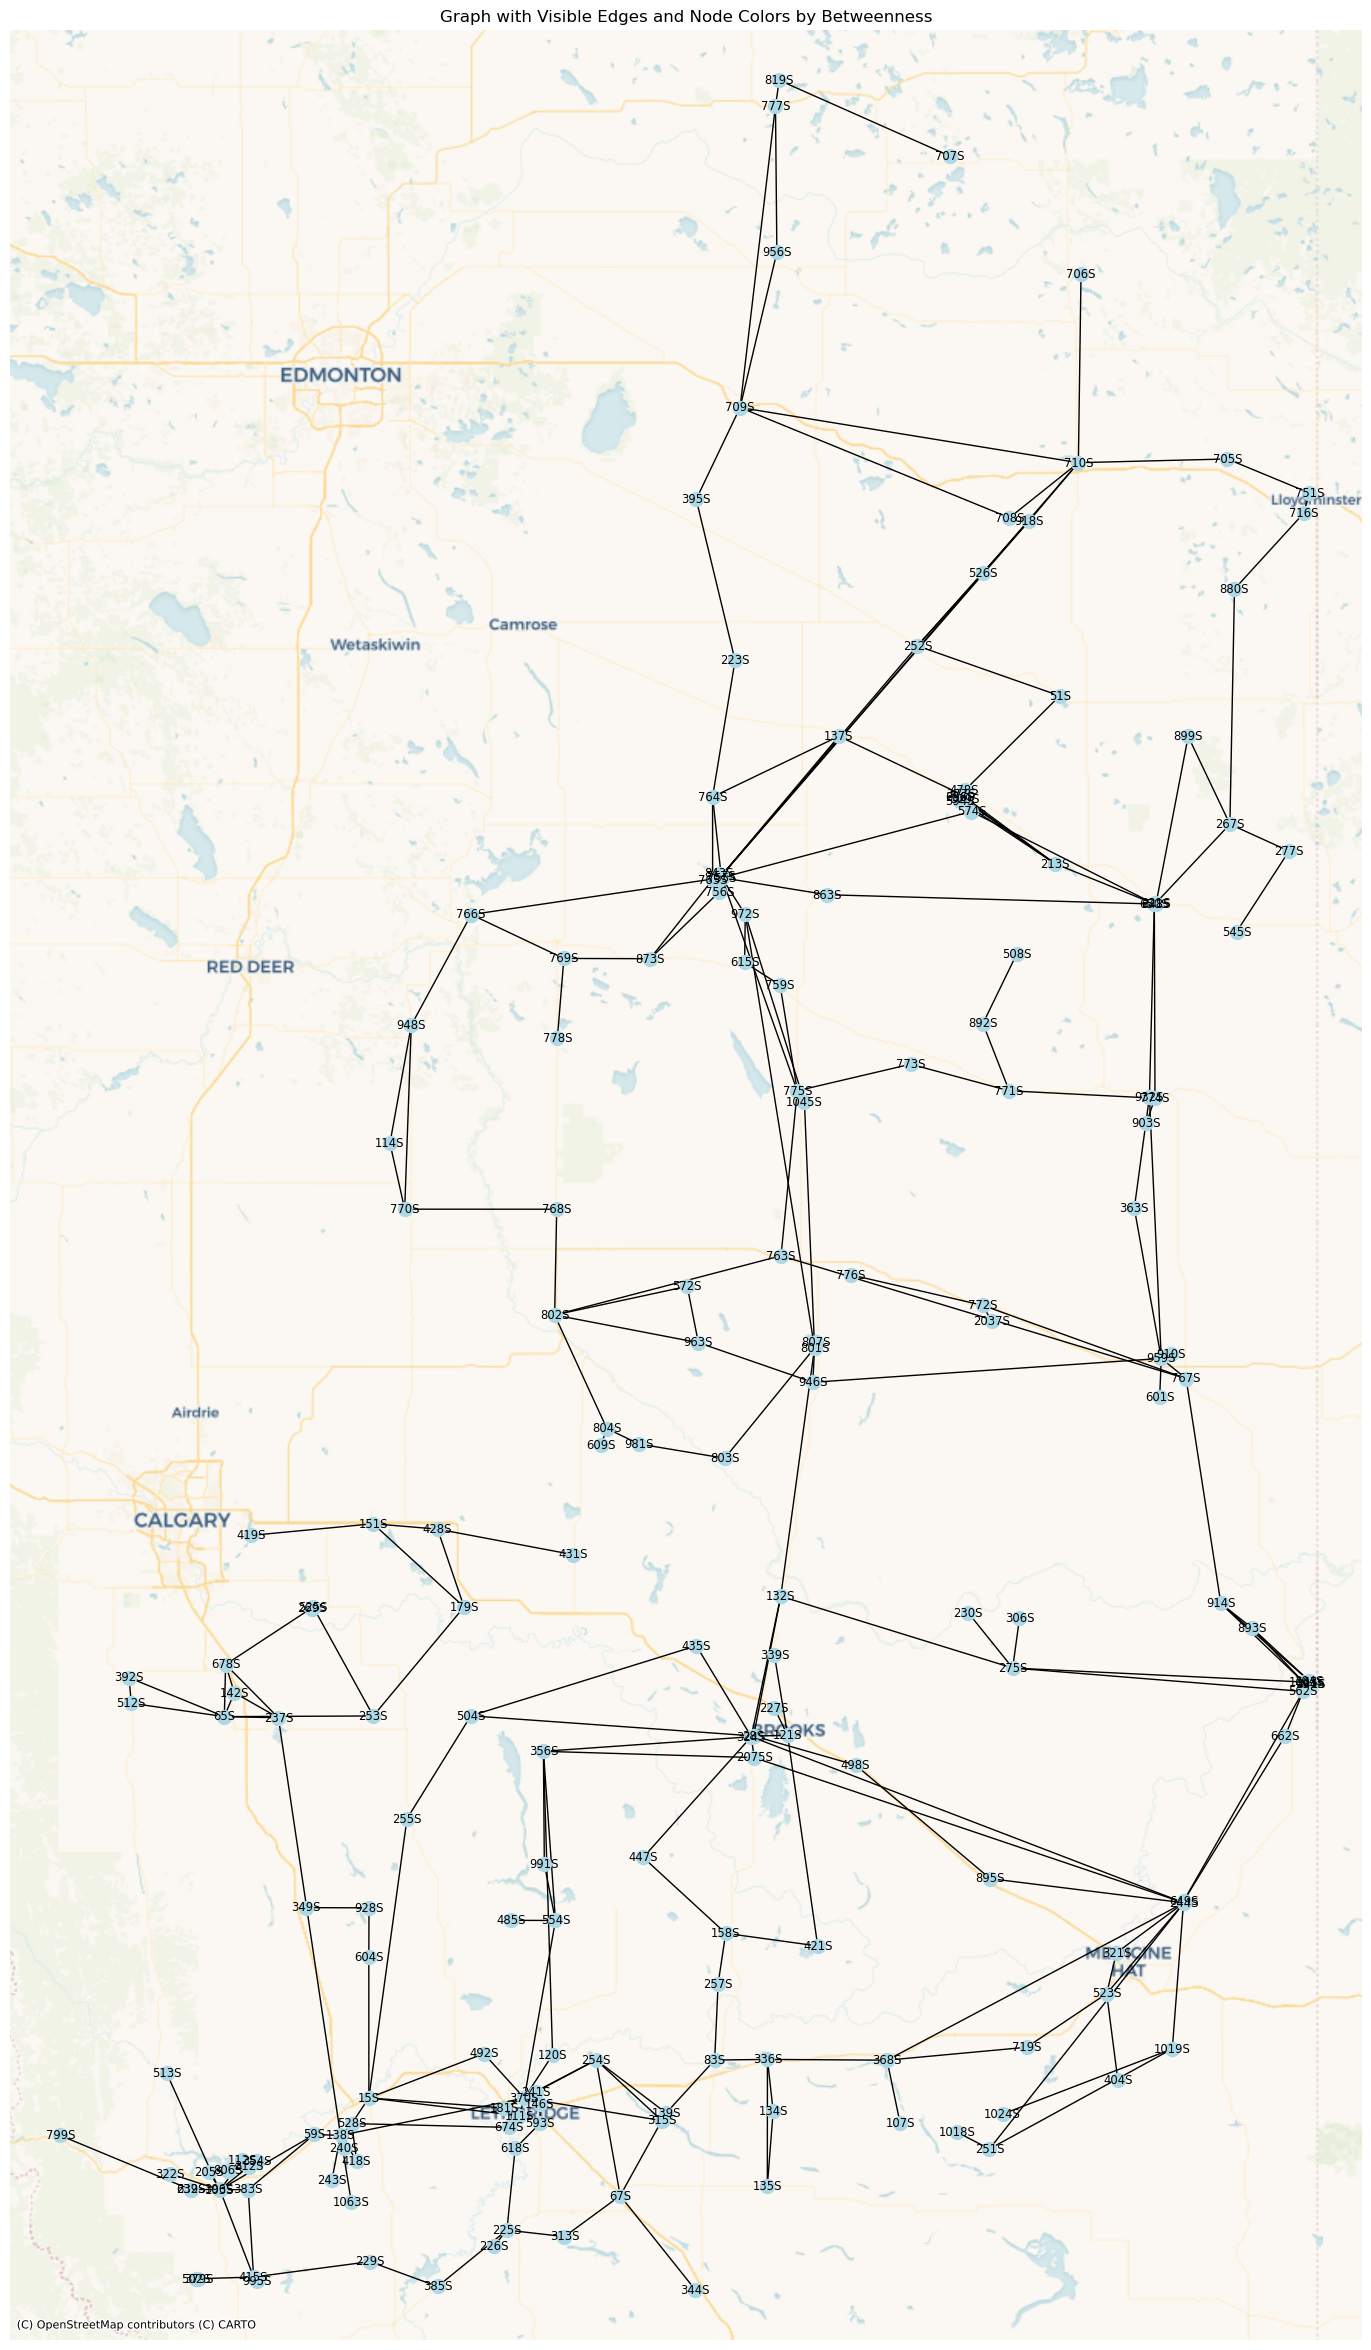

In [102]:
#**********This section is all Paul's work - he worked with real network***************

import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx


gdf_nodes = gpd.GeoDataFrame(index=G.nodes(), 
                             geometry=gpd.points_from_xy([pos[node][1] for node in G.nodes()], 
                                                         [pos[node][0] for node in G.nodes()], 
                                                         crs='EPSG:4326'))


gdf_nodes = gdf_nodes.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(20, 30))
gdf_nodes.plot(ax=ax, markersize=20, color='red')


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

# Adjust limits and plot networkx graph over the basemap
ax.set_xlim(gdf_nodes.total_bounds[[0, 2]].min() - 20000, gdf_nodes.total_bounds[[0, 2]].max() + 20000)
ax.set_ylim(gdf_nodes.total_bounds[[1, 3]].min() - 20000, gdf_nodes.total_bounds[[1, 3]].max() + 20000)


pos_mercator = {node: (point.x, point.y) for node, point in zip(gdf_nodes.index, gdf_nodes.geometry)}

nx.draw(G, pos=pos_mercator, ax=ax, node_size=100, node_color='lightblue', with_labels='node', alpha=1, font_size='small')


plt.title("Graph with Visible Edges and Node Colors by Betweenness")
plt.axis('off')
plt.show()
plt.show()


In [103]:
#This section is Rafi's work 
from geopy.distance import geodesic             # This imports geodesic function from geopy.distance module

for node1 in G.nodes():
    pos1 = nx.get_node_attributes(G, 'pos')[node1]
    for node2 in G.nodes():
        if node1 != node2:                          # This is to not compare a node to itself 
            pos2 = nx.get_node_attributes(G, 'pos')[node2]
            distance = geodesic(pos1, pos2).meters  # This is to calculate the distance between two nodes in meters


In [104]:
#This section is Rafi's work 
from geopy.distance import geodesic

total_distance = 0     #keeps track of total distance
num_pairs = 0          #keeps track of number of node pairs

# Iterate through all nodes
for node1 in G.nodes():
    pos1 = nx.get_node_attributes(G, 'pos')[node1]
    for node2 in G.nodes():
        if node1 != node2:  # Avoid comparing a node to itself
            pos2 = nx.get_node_attributes(G, 'pos')[node2]
            distance = geodesic(pos1, pos2).meters  # This is to calculate the distance between two nodes in meters
            total_distance += distance
            num_pairs += 1


average_distance = total_distance / num_pairs     # This is to calculate the average distance
print(average_distance)

206141.72457144083


Average Clustering Coefficient (Alberta Power Grid):  0.201077694235589
Average Shortest Path (Alberta Power Grid):  8.322584238373713

Average Clustering Coefficient (Random Geometric Graph):  0.6854416852220558
Average Shortest Path (Random Geometric Graph):  6.478696741854635



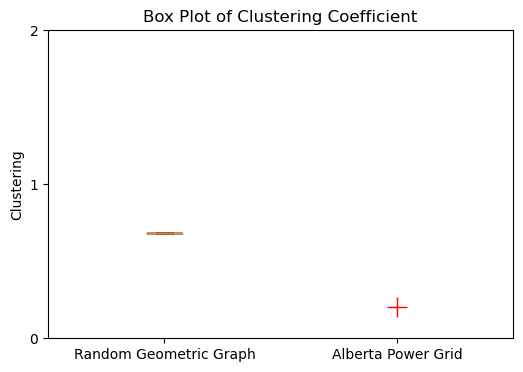

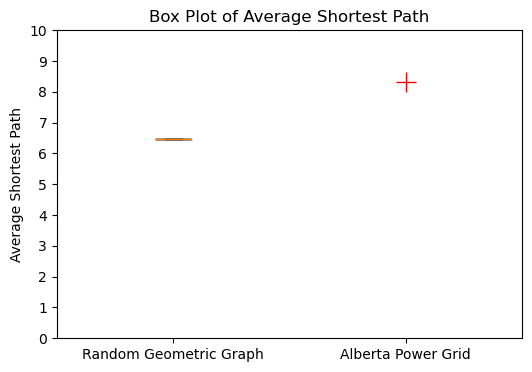

Mean Clustering Coefficient (Random Geometric Graph): 0.6854416852220558
Standard Deviation of Clustering Coefficient (Random Geometric Graph): 1.1102230246251565e-16

Mean Shortest Path Length (Random Geometric Graph): 6.478696741854635
Standard Deviation of Shortest Path Length (Random Geometric Graph): 1.7763568394002505e-15


In [105]:
#This section is Rafi's work - where an ensemble of Random Geometric Graphs have been used to create the box-plots - next section does not use an ensemble of 1000 random geometric graphs

# Generate an ensemble of Random Geometric Graphs (referred to null model exercise from class)
clustering_RGG = []
short_path_RGG = []

for i in range(1000):  
    Random_GG = nx.random_geometric_graph(G.nodes(), radius=77147, pos=pos_mercator)
    C_RGG = nx.average_clustering(Random_GG) # Calculate clustering coefficient
    clustering_RGG.append(C_RGG)
    
    if nx.is_connected(RGG):
        d_RGG = nx.average_shortest_path_length(RGG, weight=None) # Calculate shortest path length if the graph is connected
        short_path_RGG.append(d_RGG)
        
C = np.mean(list(nx.clustering(G).values()))             # Average Clustering Coefficient - G
D = nx.average_shortest_path_length(G, weight=None)      # Average Shortest Path - G

print("Average Clustering Coefficient (Alberta Power Grid): ", C)
print("Average Shortest Path (Alberta Power Grid): ", D)
print()

c = np.mean(clustering_RGG)     # Average Clustering Coefficient - RGG
d = np.mean(short_path_RGG)     # Average Shortest Path - RGG

print("Average Clustering Coefficient (Random Geometric Graph): ", c)      
print("Average Shortest Path (Random Geometric Graph): ", d)               
    
print()

# Comparison boxplot - Clustering coefficient  - referred to null model exercise file from class
fig = plt.figure(figsize=(6, 4))
plt.boxplot(clustering_RGG, positions=[1])
plt.plot(2, [C], 'r', marker='+', markersize=15)
ax = plt.gca()
ax.set_xticks([1, 2], labels=['Random Geometric Graph', 'Alberta Power Grid'])
plt.ylabel('Clustering')
plt.ylim(0, 1)
plt.yticks(np.arange(3))
plt.xlim([0.5, 2.5])
plt.title('Box Plot of Clustering Coefficient')
plt.show()

# Comparison boxplot - Average shortest path    - referred to null model exercise file from class
fig = plt.figure(figsize=(6, 4))
plt.boxplot(short_path_RGG, positions=[1])
plt.plot(2, [D], 'r', marker='+', markersize=15)
ax = plt.gca()
ax.set_xticks([1, 2], labels=['Random Geometric Graph', 'Alberta Power Grid'])
plt.ylabel('Average Shortest Path')
plt.ylim(0, 10)
plt.yticks(np.arange(11))
plt.xlim([0.5, 2.5])
plt.title('Box Plot of Average Shortest Path')
plt.show()        

print("Mean Clustering Coefficient (Random Geometric Graph):", np.mean(clustering_RGG))
print("Standard Deviation of Clustering Coefficient (Random Geometric Graph):", np.std(clustering_RGG))
print()
print("Mean Shortest Path Length (Random Geometric Graph):", np.mean(short_path_RGG))
print("Standard Deviation of Shortest Path Length (Random Geometric Graph):", np.std(short_path_RGG))


Random Geometric Graph below


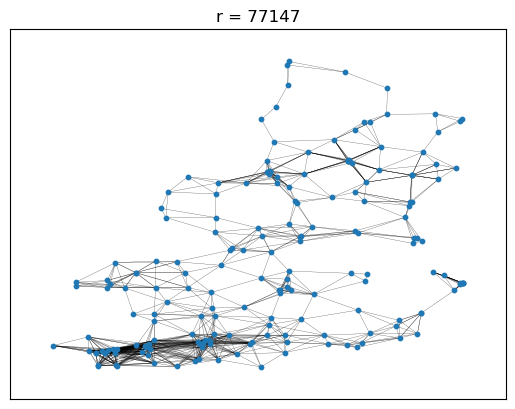



Degree Distribution of Alberta Power Grid below


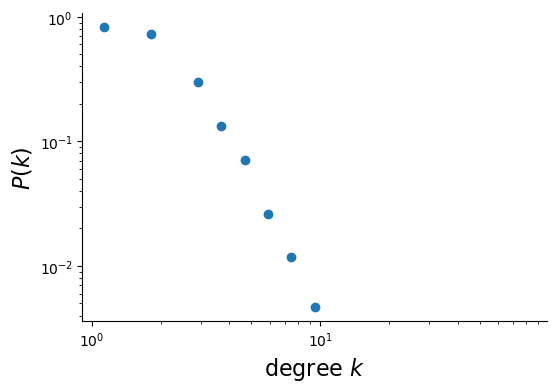



Degree Distribution of Random Geometric Graph below


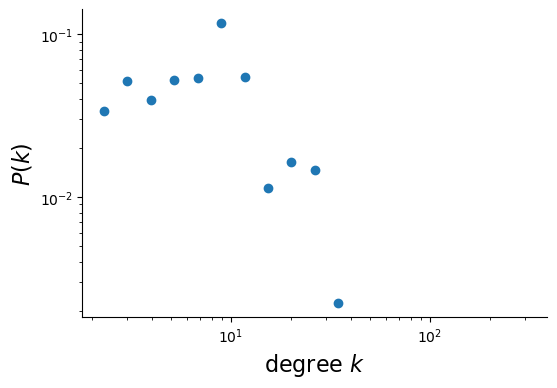




Average Clustering Coefficient (Alberta Power Grid):  0.201077694235589
Average Shortest Path (Alberta Power Grid):  8.322584238373713


Average Clustering Coefficient (Random Geometric Graph):  0.685441685222056
Average Shortest Path (Random Geometric Graph):  6.478696741854637




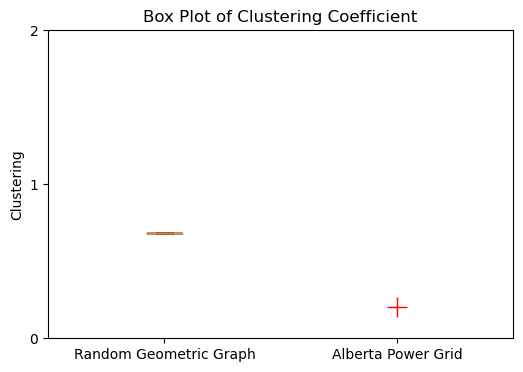

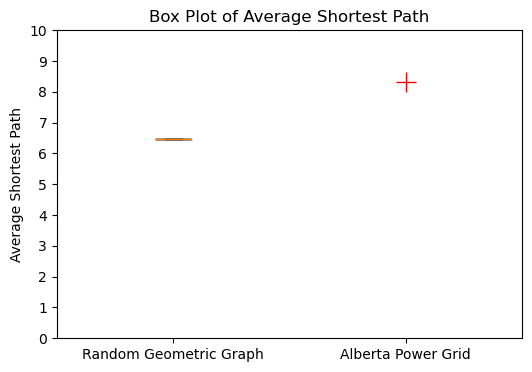

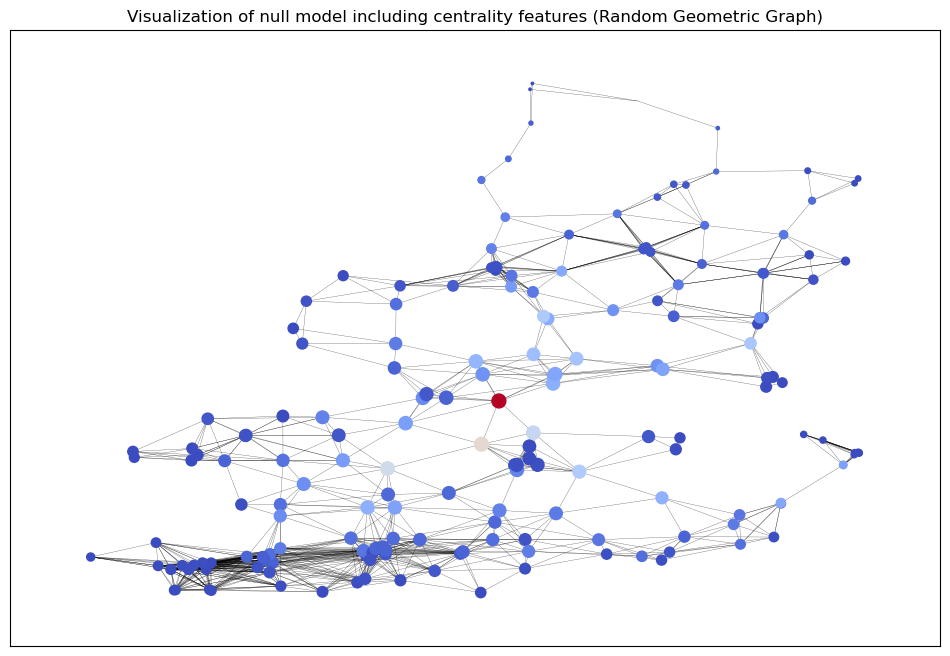

In [106]:
#This section is Rafi's work


#referred to https://networkx.org/nx-guides/content/generators/geometric.html to have an idea on how to create the random geometric graph in the function just below
def random_geometric_graph_visual(G, pos_mercator, ax=None, radius=77147, alpha=0.8, lw=0.2): #visualizing function with parameters
    fig, ax = plt.subplots()                                                                  #new figure and axes are created for plotting  
    RGG = nx.random_geometric_graph(G.nodes(), radius=radius, pos=pos_mercator)               #generating a random geometric graph
    nx.draw_networkx_nodes(G, pos=pos_mercator, ax=ax, node_size=10)                          #drawing the nodes
    nx.draw_networkx_edges(RGG, pos=pos_mercator, ax=ax, alpha=alpha, width=lw)               #drawing the edges
    ax.set_title("r = 77147")                                                                 #title of the plot
    plt.show()                                                                                #displaying the plot
    return RGG


print()
print("Random Geometric Graph below")

RGG = random_geometric_graph_visual(G, pos_mercator, ax=None, radius=77147, alpha=0.8, lw=0.2)

def plot_degree_dist(G):                        #Plotting degree distribution function (referred to null model exercise from class)
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin > 0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax) + 1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax) + 1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6, 4))
    log_be = np.log10(bin_edges)
    x = 10 ** ((log_be[1:] + log_be[:-1]) / 2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()
    
    

print()
print()


print("Degree Distribution of Alberta Power Grid below")
plot_degree_dist(G)

print()
print()

print("Degree Distribution of Random Geometric Graph below")
plot_degree_dist(RGG)








def comparison(G, RGG):
    C = np.mean(list(nx.clustering(G).values()))             # Average Clustering Coefficient - G
    D = nx.average_shortest_path_length(G, weight=None)      # Average Shortest Path - G
    print()

    print("Average Clustering Coefficient (Alberta Power Grid): ", C)
    print("Average Shortest Path (Alberta Power Grid): ", D)
    print()
    print()


    c = np.mean(list(nx.clustering(RGG).values()))            # Average Clustering Coefficient - RGG
    d = nx.average_shortest_path_length(RGG, weight=None)     # Average Shortest Path - RGG

    print("Average Clustering Coefficient (Random Geometric Graph): ", c)      
    print("Average Shortest Path (Random Geometric Graph): ", d)               
    
    print()
    print()

    # Comparison boxplot - Clustering coefficient    - referred to null model exercise file from class
    fig = plt.figure(figsize=(6, 4))
    plt.boxplot(clustering_RGG, positions=[1])
    plt.plot(2, [C], 'r', marker='+', markersize=15)
    ax = plt.gca()
    ax.set_xticks([1, 2], labels=['Random Geometric Graph', 'Alberta Power Grid'])
    plt.ylabel('Clustering')
    plt.ylim(0, 1)
    plt.yticks(np.arange(3))
    plt.xlim([0.5, 2.5])
    plt.title('Box Plot of Clustering Coefficient')
    plt.show()

    # Comparison boxplot - Average shortest path     - referred to null model exercise file from class
    fig = plt.figure(figsize=(6, 4))
    plt.boxplot(short_path_RGG, positions=[1])
    plt.plot(2, [D], 'r', marker='+', markersize=15)
    ax = plt.gca()
    ax.set_xticks([1, 2], labels=['Random Geometric Graph', 'Alberta Power Grid'])
    plt.ylabel('Average Shortest Path')
    plt.ylim(0, 10)
    plt.yticks(np.arange(11))
    plt.xlim([0.5, 2.5])
    plt.title('Box Plot of Average Shortest Path')
    plt.show() 
    


print()
print()


comparison(G, RGG)







# Betweenness centrality and closeness centrality (Random Geometric Model)
betweenness_RGG = nx.betweenness_centrality(RGG)
closeness_RGG = nx.closeness_centrality(RGG)


def plot_RGG_including_centrality(RGG, pos, betweenness_centrality, closeness_centrality):
    
    # Normalize betweenness centrality values
    betweenness_values = betweenness_centrality.values()
    max_closeness = max(betweenness_values)
    normalized_betweenness_centrality = {node: value / max_closeness for node, value in betweenness_centrality.items()}
    node_colors = [normalized_betweenness_centrality.get(node) for node in G.nodes()]
    
    # Normalize closeness centrality values
    closeness_values = list(closeness_centrality.values())
    min_closeness = min(closeness_values)
    max_closeness = max(closeness_values)
    normalized_closeness = [(c - min_closeness) / (max_closeness - min_closeness) for c in closeness_values] 
    node_sizes = [c * 100 for c in normalized_closeness]
    
    # Visualization
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw_networkx_nodes(RGG, pos=pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm)
    nx.draw_networkx_edges(RGG, pos=pos, ax=ax, alpha=0.8, width=0.2)
    ax.set_title("Visualization of null model including centrality features (Random Geometric Graph)")
    plt.axis('on')
    plt.show()


# Plot the Random Geometric Model (betweenness centrality - node colors and closeness centrality - sizes)
plot_RGG_including_centrality(RGG, pos_mercator, betweenness_RGG, closeness_RGG)